In [2]:
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LogNorm

from astropy.io import fits

from gunagala import imager, psf

from mocks.mocks import create_mock_galaxy_noiseless_image 
from mocks.mocks import compute_pixel_scale
from mocks.mocks import mock_image_stack



%matplotlib inline
rcParams['figure.figsize'] = (12,8)

### Loading simulation data

In [3]:
sim_data='sim_data/cl19.fits'
galaxy_sim_data = fits.open(sim_data)[0].data

### Plotting the raw simulation data

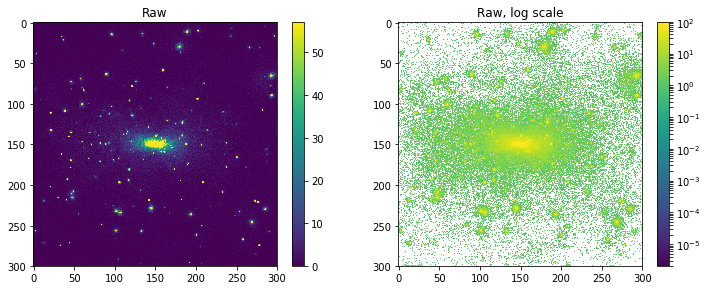

In [4]:
plt.subplot(1,2,1)
plt.imshow(galaxy_sim_data, vmin=0, vmax=57)
plt.colorbar()
plt.title('Raw')
plt.subplot(1,2,2)
plt.imshow(galaxy_sim_data, norm=LogNorm(), vmin=2e-6, vmax=1e2)
plt.colorbar()
plt.title('Raw, log scale')
plt.gcf().set_size_inches(12, 4.5)

In [5]:
print(galaxy_sim_data.max(), galaxy_sim_data.min(), galaxy_sim_data.shape)

862.0 0.0 (300, 300)


### Setup an imager system to get the default parameters.

In [6]:
imagers = imager.create_imagers()
huntsman = imagers['canon_sbig_dark']

### Setting up pixel scal

In [7]:
sim_arcsec_pixel = compute_pixel_scale(10, 170)

### Creating noiseless mock image using 

`mocks.mocks.create_mock_galaxy_noiseless_image`

In [8]:
galaxy_coordinates = '14h40m56.435s -60d53m48.3s'

In [9]:
alpha_cen_image = create_mock_galaxy_noiseless_image(galaxy_sim_data,
                                                     huntsman,
                                                     sim_arcsec_pixel,
                                                     galaxy_coordinates)

/Users/amir.ebadati-bazkiaei/gunagala/gunagala/psf.py:417: UserWarning: Warning: below zero values in resampled PSF. Clipping to zero.
  warn("Warning: below zero values in resampled PSF. Clipping to zero.")


In [10]:
print(alpha_cen_image.data.max(), alpha_cen_image.data.min(), alpha_cen_image.shape)

56.087156345528236 1.274705830156097 (3326, 2504)


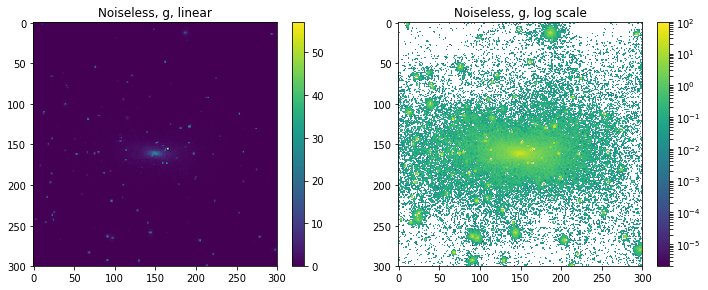

In [11]:
sky_background = np.median(alpha_cen_image[1500:1800,1100:1400])

plt.subplot(1,2,1)
plt.imshow(alpha_cen_image[1500:1800,1100:1400] - sky_background, vmin=0, vmax=57)
plt.colorbar()
plt.title('Noiseless, g, linear')
plt.subplot(1,2,2)
plt.imshow(alpha_cen_image[1500:1800,1100:1400] - sky_background, norm=LogNorm(), vmin=2e-6, vmax=1e2)
plt.colorbar()
plt.title('Noiseless, g, log scale')
plt.gcf().set_size_inches(12, 4.5)

In [12]:
sky_background

1.34860364625048

### Creating stack function imager:

In [13]:
galaxy_psf = psf.PixellatedPSF(galaxy_sim_data,
                               psf_sampling=sim_arcsec_pixel,
                               oversampling=10,
                               psf_centre=(150, 150))
huntsman_galaxy = imager.Imager(optic=huntsman.optic,
                                camera=huntsman.camera,
                                filters=huntsman.filters,
                                psf=galaxy_psf,
                                sky=huntsman.sky)

/Users/amir.ebadati-bazkiaei/gunagala/gunagala/psf.py:417: UserWarning: Warning: below zero values in resampled PSF. Clipping to zero.
  warn("Warning: below zero values in resampled PSF. Clipping to zero.")


In [15]:
stcked_image = mock_image_stack(alpha_cen_image, huntsman_galaxy)

In [16]:
print(stcked_image.max(), stcked_image.min(), stcked_image.shape, type(fari))

NameError: name 'fari' is not defined

In [ ]:
plt.subplot(1,2,1)
plt.imshow(stcked_image[1500:1800,1100:1400]) #, vmin=0, vmax=2e-3, interpolation='nearest')
plt.colorbar()
plt.title('Stacked Image, linear')
plt.subplot(1,2,2)
plt.imshow(stcked_image[1500:1800,1100:1400], norm=LogNorm()) #, vmin=2e-8, vmax=2e-3)
plt.colorbar()
plt.title('Stacked Image, log scale')

plt.gcf().set_size_inches(12, 4.5)